In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time as tm
import random as rnd
from IPython import display
%matplotlib inline

#### Упражнение 1
На одном графике изобразите время затраченное на вычисление с использованием массивов numpy и стандартных списков в питоне.
Для более точных результатов замеряйте время выполнения функции несколько раз и усредняйте.
Используйте функцию

$z=2\cdot x^2+4\cdot y$

Перемножение матриц размера $n \times n$

In [2]:
# Определение значения функции
def calc_func(n):
    # Используем список
    x = [rnd.randrange(1, 50, 1) for i in range(n)]
    y = [rnd.randrange(1, 100, 1) for i in range(n)]
    z = []
    t0 = tm.time()
    z = [2 * x[i] ** 2 + 4 * y[i] for i in range(n)]
    t1 =  tm.time() - t0
    # Используем numpy
    x = np.random.randint(1, 50, n)
    y = np.random.randint(1, 100, n)
    t0 = tm.time()
    z = 2 * x ** 2 + 4 * y
    t2 = tm.time() - t0
    return t1, t2

In [3]:
# Перемножение квадратных матриц
def mult_matrix(n):
    # Используем список
    x = [[rnd.randint(0, 100) for i in range(n)] for j in range(n)]
    y = [[rnd.randint(0, 100) for i in range(n)] for j in range(n)]
    z = []
    t0 = tm.time()
    z = [[x[i][j] * y[i][j] for i in range(n)] for j in range(n)]
    t1 = tm.time() - t0
    # Используем numpy
    x = np.random.randint(1, 100, size=(n, n))
    y = np.random.randint(1, 100, size=(n, n))
    t0 = tm.time()
    z = x @ y
    t2 = tm.time() - t0
    return t1, t2

In [4]:
# Функция построения графика
def draw_plot(classic_array, numpy_array):
    plt.figure(figsize=(10, 5))
    plt.plot(classic_array, color='red', label='classic')
    plt.plot(numpy_array, color='green', label='numpy')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

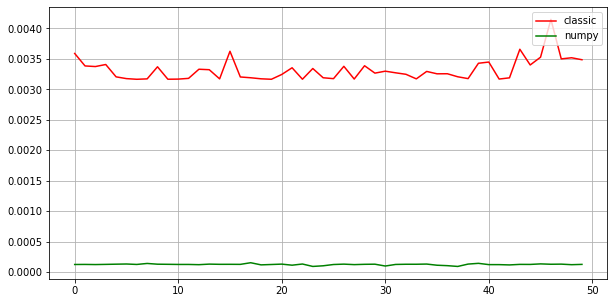

In [5]:
# Строим график времени определения значения функции классическим способом и используя numpy
n = 10000
k = 50
classic_array = np.array([calc_func(n)[0] for i in range(k)])
numpy_array = np.array([calc_func(n)[1] for i in range(k)])
draw_plot(classic_array, numpy_array)

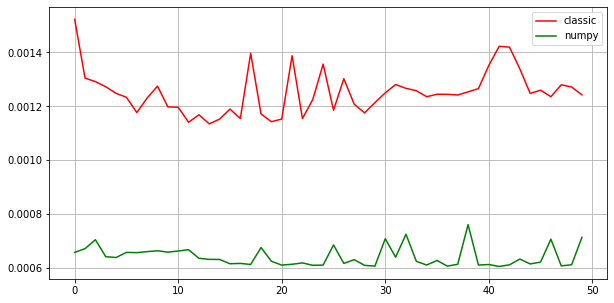

In [6]:
# Строим график времени перемножения квадратных матриц классическим способом и используя numpy
n = 100
k = 50
classic_array = np.array([mult_matrix(n)[0] for i in range(k)])
numpy_array = np.array([mult_matrix(n)[1] for i in range(k)])
draw_plot(classic_array, numpy_array)

#### Упражнение 2
* Создайте массив чисел от 2 до 75. Выведите только нечётные. 
* Присвойте нечётным числам этого массива значение -1.

In [7]:
a = np.arange(2, 76)
i = [i for i in range(1, 75, 2)]
a[i]

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69,
       71, 73, 75])

In [8]:
a[i] = - 1
a

array([ 2, -1,  4, -1,  6, -1,  8, -1, 10, -1, 12, -1, 14, -1, 16, -1, 18,
       -1, 20, -1, 22, -1, 24, -1, 26, -1, 28, -1, 30, -1, 32, -1, 34, -1,
       36, -1, 38, -1, 40, -1, 42, -1, 44, -1, 46, -1, 48, -1, 50, -1, 52,
       -1, 54, -1, 56, -1, 58, -1, 60, -1, 62, -1, 64, -1, 66, -1, 68, -1,
       70, -1, 72, -1, 74, -1])

#### Упражнение 3
* Найдите в документации функцию, которая удаляет из одного массива элементы, которые есть в другом. 
* Приведите примеры использования.

#### numpy.setdiff1d()
https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html?highlight=setdiff#numpy.setdiff1d

In [9]:
# Пример использования numpy.setdiff1d()
a = np.arange(0, 101, 5)
print(a)
b = np.arange(0, 101, 10)
print(b)
np.setdiff1d(a, b)

[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100]
[  0  10  20  30  40  50  60  70  80  90 100]


array([ 5, 15, 25, 35, 45, 55, 65, 75, 85, 95])

#### Упражнение 4
Создайте случайную квадратную матрицу случайного размера от 10 до 100.
Найдите максимум и сумму элементов.
Поделите каждый элемент матрицы на максимум.
Отнимите от каждой строки матрицы среднее по строке.
Замените максимальное значение на -1.

In [10]:
n = rnd.randint(10,100)
M  = np.random.randint(1, 1000, size=(n, n))
print(f'Исходная матрица:\n {M}')
print(f'Размер квадратной матрицы: {M.shape}')
m_max = M.max()
print(f'Максимальный элемент матрицы: {m_max}')
m_sum = M.sum()
print(f'Сумма элементов матрицы: {m_sum}')
M1 = M/m_max
print(f'Матрица после деления каждого элемента на максимум:\n {M1}')
# print(f'\n{np.mean(M[:n, :n], axis=1)}')
M2 = M[:n, :n] - np.mean(M[:n, :n], axis=1).reshape(n,1)
print(f'Матрица после вычитания из каждого элемента среднего по строке:\n {M2}')
M[M == m_max] = -1
print(f'Матрица после замены максимального элемента на -1:\n {M}')


Исходная матрица:
 [[120  94  34 ... 680 172 706]
 [972 747 487 ... 901 948 454]
 [299 848 736 ... 707 918 308]
 ...
 [245 234 692 ... 660 446 483]
 [487  64 785 ... 686 534 566]
 [842 638 443 ... 994 472 728]]
Размер квадратной матрицы: (90, 90)
Максимальный элемент матрицы: 999
Сумма элементов матрицы: 4054154
Матрица после деления каждого элемента на максимум:
 [[0.12012012 0.09409409 0.03403403 ... 0.68068068 0.17217217 0.70670671]
 [0.97297297 0.74774775 0.48748749 ... 0.9019019  0.94894895 0.45445445]
 [0.2992993  0.84884885 0.73673674 ... 0.70770771 0.91891892 0.30830831]
 ...
 [0.24524525 0.23423423 0.69269269 ... 0.66066066 0.44644645 0.48348348]
 [0.48748749 0.06406406 0.78578579 ... 0.68668669 0.53453453 0.56656657]
 [0.84284284 0.63863864 0.44344344 ... 0.99499499 0.47247247 0.72872873]]
Матрица после вычитания из каждого элемента среднего по строке:
 [[-313.72222222 -339.72222222 -399.72222222 ...  246.27777778
  -261.72222222  272.27777778]
 [ 469.17777778  244.17777778  

#### Упражнение 5
Напишите функцию, которая берет многомерный вещественный массив с пропущенными значениями (np.nan) и возвращает его копию с заполненными пропусками (заменять средним значением всех элементов массива). Если в массиве одни пропущенные значения, заполните их нулями.

In [11]:
def replace_pass(x_in):
    x = x_in.copy()
    if np.sum(np.isnan(x)) == n * k:
        x[np.isnan(x)] = 0
        print(0)
    else:
        xmean = np.nanmean(x)
        x[np.isnan(x)] = xmean
        print(f'Среднее значение неравных nan элементнов массива {xmean}')
    return x
    

In [12]:
n = 4
k = 5
p = 8
x = np.random.random((n, k))
for i in range(8):
    x[rnd.randint(0, n - 1), rnd.randint(0, k - 1)] = np.nan
print(x)
print(replace_pass(x)) 
    

[[0.64817231 0.6219952         nan        nan        nan]
 [0.8822468  0.03294056        nan 0.03384651 0.23233526]
 [0.38056806 0.08913702        nan 0.63717466 0.27221266]
 [0.11318431 0.7837091  0.56691734 0.70658373        nan]]
Среднее значение неравных nan элементнов массива 0.4286445370328041
[[0.64817231 0.6219952  0.42864454 0.42864454 0.42864454]
 [0.8822468  0.03294056 0.42864454 0.03384651 0.23233526]
 [0.38056806 0.08913702 0.42864454 0.63717466 0.27221266]
 [0.11318431 0.7837091  0.56691734 0.70658373 0.42864454]]


#### Упражнение 6
Напишите функцию которая нормализирует заданный numpy-массив, так чтобы его значения лежали в интервале $[0, 1]$

In [13]:
def norm_array(x_in):
    x = x_in.copy()
    xmax = x.max()
    x = x/xmax
    return x



In [14]:
n = 10
k = 5
p = 8
x = np.random.randint(0, 100, size=(n, k))
print(f'Исходный массив:\n {x}')
print(f'Нормализованный массив:\n {norm_array(x)}')


Исходный массив:
 [[56 95 61 17 49]
 [63 34 55 53 25]
 [29 25 32 43 41]
 [63  2  4 29 74]
 [82  9 24 36 80]
 [14 75 54 90 63]
 [20 18 47 92 54]
 [71 28  7 10 30]
 [85 94 54 22  4]
 [16 92 81 85 42]]
Нормализованный массив:
 [[0.58947368 1.         0.64210526 0.17894737 0.51578947]
 [0.66315789 0.35789474 0.57894737 0.55789474 0.26315789]
 [0.30526316 0.26315789 0.33684211 0.45263158 0.43157895]
 [0.66315789 0.02105263 0.04210526 0.30526316 0.77894737]
 [0.86315789 0.09473684 0.25263158 0.37894737 0.84210526]
 [0.14736842 0.78947368 0.56842105 0.94736842 0.66315789]
 [0.21052632 0.18947368 0.49473684 0.96842105 0.56842105]
 [0.74736842 0.29473684 0.07368421 0.10526316 0.31578947]
 [0.89473684 0.98947368 0.56842105 0.23157895 0.04210526]
 [0.16842105 0.96842105 0.85263158 0.89473684 0.44210526]]


#### Упражнение 7
* Запишите numpy-array в файл.
* Считайте numpy-array из файла.

In [15]:
# Запись в файл
np.save('task7', x)


In [16]:
# Чтение из файла
y = np.load('task7.npy')
y

array([[56, 95, 61, 17, 49],
       [63, 34, 55, 53, 25],
       [29, 25, 32, 43, 41],
       [63,  2,  4, 29, 74],
       [82,  9, 24, 36, 80],
       [14, 75, 54, 90, 63],
       [20, 18, 47, 92, 54],
       [71, 28,  7, 10, 30],
       [85, 94, 54, 22,  4],
       [16, 92, 81, 85, 42]])

#### Упражнение 8
* Создайте случайный массив
* Найдите в массиве элемент ближайший к данному

In [17]:
# Создадим массив из случайных целочисленных элементов заданной формы
n = 5
k = 5
x = np.random.randint(1, 10000, size=(n, k))
print(f'Исходный массив:\n {x}')
# Определим значение из интервала [1, 10000]
p = 1234
# Найдем ближайший элемент
r = np.abs(x - p)
mr = r.min()
i, j = np.where(r == mr)
print(f'Ближайший к {p} элемент равен {x[i, j]}, его индексы: {i} и {j}.')

Исходный массив:
 [[4633 2809  303 5282 7982]
 [1434 3488 8620 2866 1169]
 [6892 2470 5040 7092 6921]
 [7808 3147 9546 9028 6301]
 [6884  405 9029 9355  161]]
Ближайший к 1234 элемент равен [1169], его индексы: [1] и [4].


#### Упражнение 9

Напишите функцию, которая возвращает  $n \times m$ целочисленную матрицу с заданным значением на границах матрицы и с заданным значением внутри

In [18]:
inside = 1
border = 2
n = 10
m = 15
y = np.full((n , m), inside)
y[0, :] = border
y[n - 1, :] = border
y[:, 0] = border
y[:, m - 1] = border
y

array([[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
       [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
       [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
       [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
       [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
       [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
       [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
       [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]])

### Упражнение 10
Напишите функцию, которая сортирует строки данной матрицы по значениям заданного столбца в порядке убывания. 

In [19]:
def sort_matrix(x, k):
    return x[x[:,k].argsort()]

In [20]:
n = 5
m = 5
k = 2
x = np.random.randint(1, 10000, size=(n, m))
print(f'Исходный массив:\n {x}')
y = sort_matrix(x, k)
print(f'Отсортированный по столбцу {k} массив:\n {y}')

Исходный массив:
 [[7282 9724 6493 2637 3260]
 [4501 1260 9064 2278 8990]
 [8678 3859 2025 9103 1442]
 [9514 5793 7498 4065 1189]
 [3338 2575 9148 3123 4407]]
Отсортированный по столбцу 2 массив:
 [[8678 3859 2025 9103 1442]
 [7282 9724 6493 2637 3260]
 [9514 5793 7498 4065 1189]
 [4501 1260 9064 2278 8990]
 [3338 2575 9148 3123 4407]]


####  Упражнение 11

Напишите функцию, которая создает двоичную матрицу шахматной доски с заданным shape

Пример 4x4:
```python
[[0, 1, 0, 1],
 [1, 0, 1, 0],
 [0, 1, 0, 1],
 [1, 0, 1, 0]]
```

In [21]:
def chessboard(k):
    return np.tile(a, (k//2, k//2))

In [22]:
k = 8
a = [[1, 0], [0, 1]]
b = chessboard(k)
b

array([[1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1]])

#### Упражнение 12
* Напишите игру [life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life), используя массивы numpy.
* Визуализируйте интерактивно ее результаты.

In [61]:
def init_earth(n):
    x = np.random.randint(0, 2, size=(n, n))
    return x
def check_neighbors(x, n):
    n = (x[0:-2,0:-2] + x[0:-2,1:-1] + x[0:-2,2:] + 
         x[1:-1,0:-2] + x[1:-1,2:] +
         x[2:  ,0:-2] + x[2:  ,1:-1] + x[2:  ,2:])
    b = (n == 3) & (x[1:-1,1:-1] == 0)
    s = ((n == 2) | (n == 3)) & (x[1:-1,1:-1] == 1)
    x[:,:] = 0
    x[1:-1,1:-1][b | s] = 1
    return x
def ploting(x):
    plt.subplots(figsize=(5,5))
    sns.heatmap(x, square=True, cbar=False)
    plt.show()
    display.clear_output(wait=True)
    tm.sleep(0.2)

Распределение живых клеток в начале игры называется первым поколением. Каждое следующее поколение рассчитывается на основе предыдущего по таким правилам:
* в пустой (мёртвой) клетке, рядом с которой ровно три живые клетки, зарождается жизнь;
* если у живой клетки есть две или три живые соседки, то эта клетка продолжает жить; в противном случае, если соседей меньше двух или больше трёх, клетка умирает («от одиночества» или «от перенаселённости»)

29


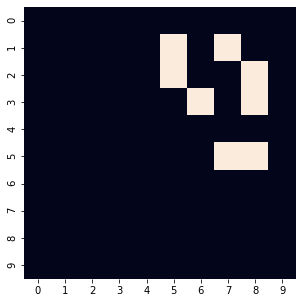

In [67]:
# Размер поля
m = 10
# Количество циклов
k = 30
x = init_earth(m)
n =  np.zeros(x.shape, dtype=int)
for i in range(k):
    print(i)
    check_neighbors(x, k)  
    ploting(x)   